## csv 読み込み, 表示、タイトル追加

In [1]:
import os 
os.getcwd()

'/Users/katoy/github/python/study-jupyter'

See https://okumuralab.org/~okumura/python/sexratio.html
出生性比（出生数の男/女の比）をプロットしてみる

In [2]:
# https://www.e-stat.go.jp/stat-search/files?page=1&query=年次別にみた出生数・出生率（人口千対）・出生性比及び合計特殊出生率&layout=dataset&stat_infid=000032235768&metadata=1&data=1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2001 年にある全角スペースを処理するためにspe, engine を指定する
data = pd.read_csv('data/mb010000.csv', encoding="cp932", skiprows=11, na_values="…", keep_default_na=False, 
                   sep="\s*,", engine='python',
                  names=["年", "出生数_総数", "出生数_男", "出生数_女", "出生率", "出生性比", "合計特殊出生率"])

In [3]:
data.dtypes

年            int64
出生数_総数       int64
出生数_男        int64
出生数_女        int64
出生率        float64
出生性比       float64
合計特殊出生率    float64
dtype: object

In [4]:
# 2001 年にある全角スペースがうまく処理できているかを確認
data.tail(24).head(8)

,年,出生数_総数,出生数_男,出生数_女,出生率,出生性比,合計特殊出生率
96,1998,1203147,617414,585733,9.6,105.4,1.38
97,1999,1177669,604769,572900,9.4,105.6,1.34
98,2000,1190547,612148,578399,9.5,105.8,1.36
99,2001,1170662,600918,569744,9.3,105.5,1.33
100,2002,1153855,592840,561015,9.2,105.7,1.32
101,2003,1123610,576736,546874,8.9,105.5,1.29
102,2004,1110721,569559,541162,8.8,105.2,1.29
103,2005,1062530,545032,517498,8.4,105.3,1.26


In [5]:
data.describe()

,年,出生数_総数,出生数_男,出生数_女,出生率,出生性比,合計特殊出生率
count,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,120.000000,75.000000
mean,1960.375000,1.633824e+06,8.379291e+05,7.958946e+05,21.069167,105.312500,1.877600
std,36.016817,4.280958e+05,2.191633e+05,2.089916e+05,10.447828,0.865352,0.697526
min,1899.000000,8.116220e+05,4.159030e+05,3.957190e+05,6.600000,102.700000,1.260000
25%,1928.750000,1.222830e+06,6.282040e+05,5.946260e+05,9.975000,104.900000,1.415000
50%,1961.500000,1.661168e+06,8.513850e+05,8.080770e+05,18.600000,105.300000,1.740000
75%,1991.250000,1.992787e+06,1.018090e+06,9.693818e+05,32.400000,105.800000,2.080000
max,2021.000000,2.696638e+06,1.380008e+06,1.316630e+06,36.200000,108.700000,4.540000


In [6]:
data.describe()

,年,出生数_総数,出生数_男,出生数_女,出生率,出生性比,合計特殊出生率
count,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,120.000000,75.000000
mean,1960.375000,1.633824e+06,8.379291e+05,7.958946e+05,21.069167,105.312500,1.877600
std,36.016817,4.280958e+05,2.191633e+05,2.089916e+05,10.447828,0.865352,0.697526
min,1899.000000,8.116220e+05,4.159030e+05,3.957190e+05,6.600000,102.700000,1.260000
25%,1928.750000,1.222830e+06,6.282040e+05,5.946260e+05,9.975000,104.900000,1.415000
50%,1961.500000,1.661168e+06,8.513850e+05,8.080770e+05,18.600000,105.300000,1.740000
75%,1991.250000,1.992787e+06,1.018090e+06,9.693818e+05,32.400000,105.800000,2.080000
max,2021.000000,2.696638e+06,1.380008e+06,1.316630e+06,36.200000,108.700000,4.540000


In [7]:
data["出生数_男"]

0      713442
1      727916
2      769494
3      773296
4      763806
        ...  
115    484478
116    470851
117    443430
118    430713
119    415903
Name: 出生数_男, Length: 120, dtype: int64

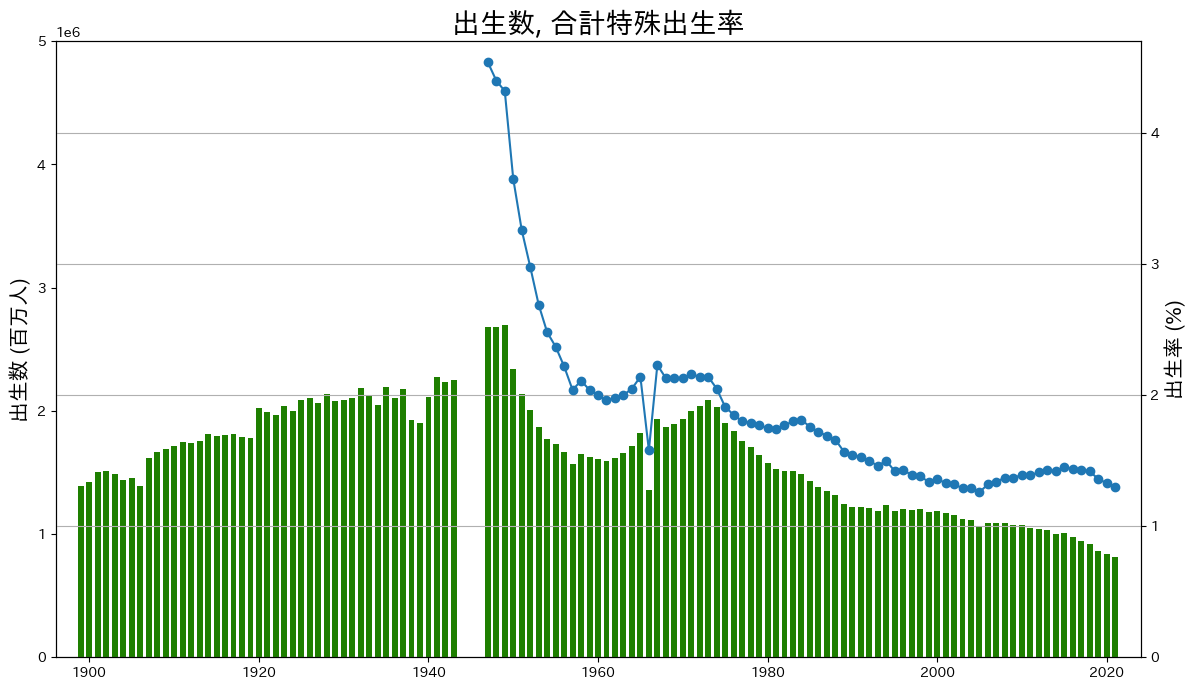

In [95]:
# 出生数
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 2001 年にある全角スペースを処理するためにspe, engine を指定する
data = pd.read_csv('data/mb010000.csv', encoding="cp932", skiprows=11, na_values="…", keep_default_na=False, 
                   sep="\s*,", engine='python',
                  names=["年", "出生数_総数", "出生数_男", "出生数_女", "出生率", "出生性比", "合計特殊出生率"])
df = data
df1 = pd.DataFrame({"年": [1944, 1945, 1946]})
df2 = pd.merge(df1, df, how="outer", sort=True)

fig, ax1 = plt.subplots(1,1,figsize=(14,8))
ax2 = ax1.twinx()
plt.xlim([1900 - 4, 2024])
plt.title('出生数, 合計特殊出生率', fontsize=20)
plt.xlabel('年')
ax1.set_ylabel('出生数 (百万人)', fontsize=15)
ax1.set_ylim(0, 5000000)
ax2.set_ylabel('出生率 (%)', fontsize=15)
ax2.set_ylim(0, 4.7)
ax1.bar(df2["年"], df2["出生数_総数"], width=0.7, align="center", color="#1E7F00", linewidth=0)
ax2.plot(df2["年"], df2["合計特殊出生率"], "o-")
plt.grid()

合計特殊出生率（ごうけいとくしゅしゅっしょうりつ、英：total fertility rate、TFR）

人口統計上の指標で、15～49歳までの既婚・未婚問わない全女性の年齢別出生率を合計したもので、女性人口の年齢構成の違いを除いた「その年の出生率」を意味する。年次比較、国際比較、地域比較に用いられている。
一人の女性がその年齢別出生率で一生の間に産むとしたときの子供の人数に相当する。